# Rosenbrock

Compile, run, and plot the result from Ros.cpp


[see this paper for different methods](https://www.semanticscholar.org/paper/Improved-traditional-Rosenbrock-Wanner-methods-for-Rang/1723a6df73a7fd445d89123007e1fcaa5fc368e6#related-papers)

Also comparison between RODASPR2 and ROS34PW2, where you can see that the former is usually faster and more accurate (especially when the minimum allowed number of steps is reached).

In [1]:
import os

In [2]:
import numpy as np

import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=10
plt.rcParams['mathtext.fontset']='stixsans'

In [3]:
os.system(r'g++  ../Ros.cpp -I ../ -std=c++17 -DMETHOD=RODASPR2')

0

In [4]:
%%timeit -n 1 -r 1
os.system(r'./a.out')

34.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [5]:
#load the results

t_RODASPR2= np.loadtxt('t.dat')
y1_RODASPR2=np.loadtxt('y1.dat')
y2_RODASPR2=np.loadtxt('y2.dat')
y3_RODASPR2=np.loadtxt('y3.dat')

err_RODASPR2=np.loadtxt('err.dat')

In [6]:
os.system(r'g++  ../Ros.cpp -I ../ -std=c++17 -DMETHOD=ROS34PW2')

0

In [7]:
%%timeit -n 1 -r 1
os.system(r'./a.out')

143 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
#load the results

t_ROS34PW2= np.loadtxt('t.dat')
y1_ROS34PW2=np.loadtxt('y1.dat')
y2_ROS34PW2=np.loadtxt('y2.dat')
y3_ROS34PW2=np.loadtxt('y3.dat')

err_ROS34PW2=np.loadtxt('err.dat')

<IPython.core.display.Javascript object>


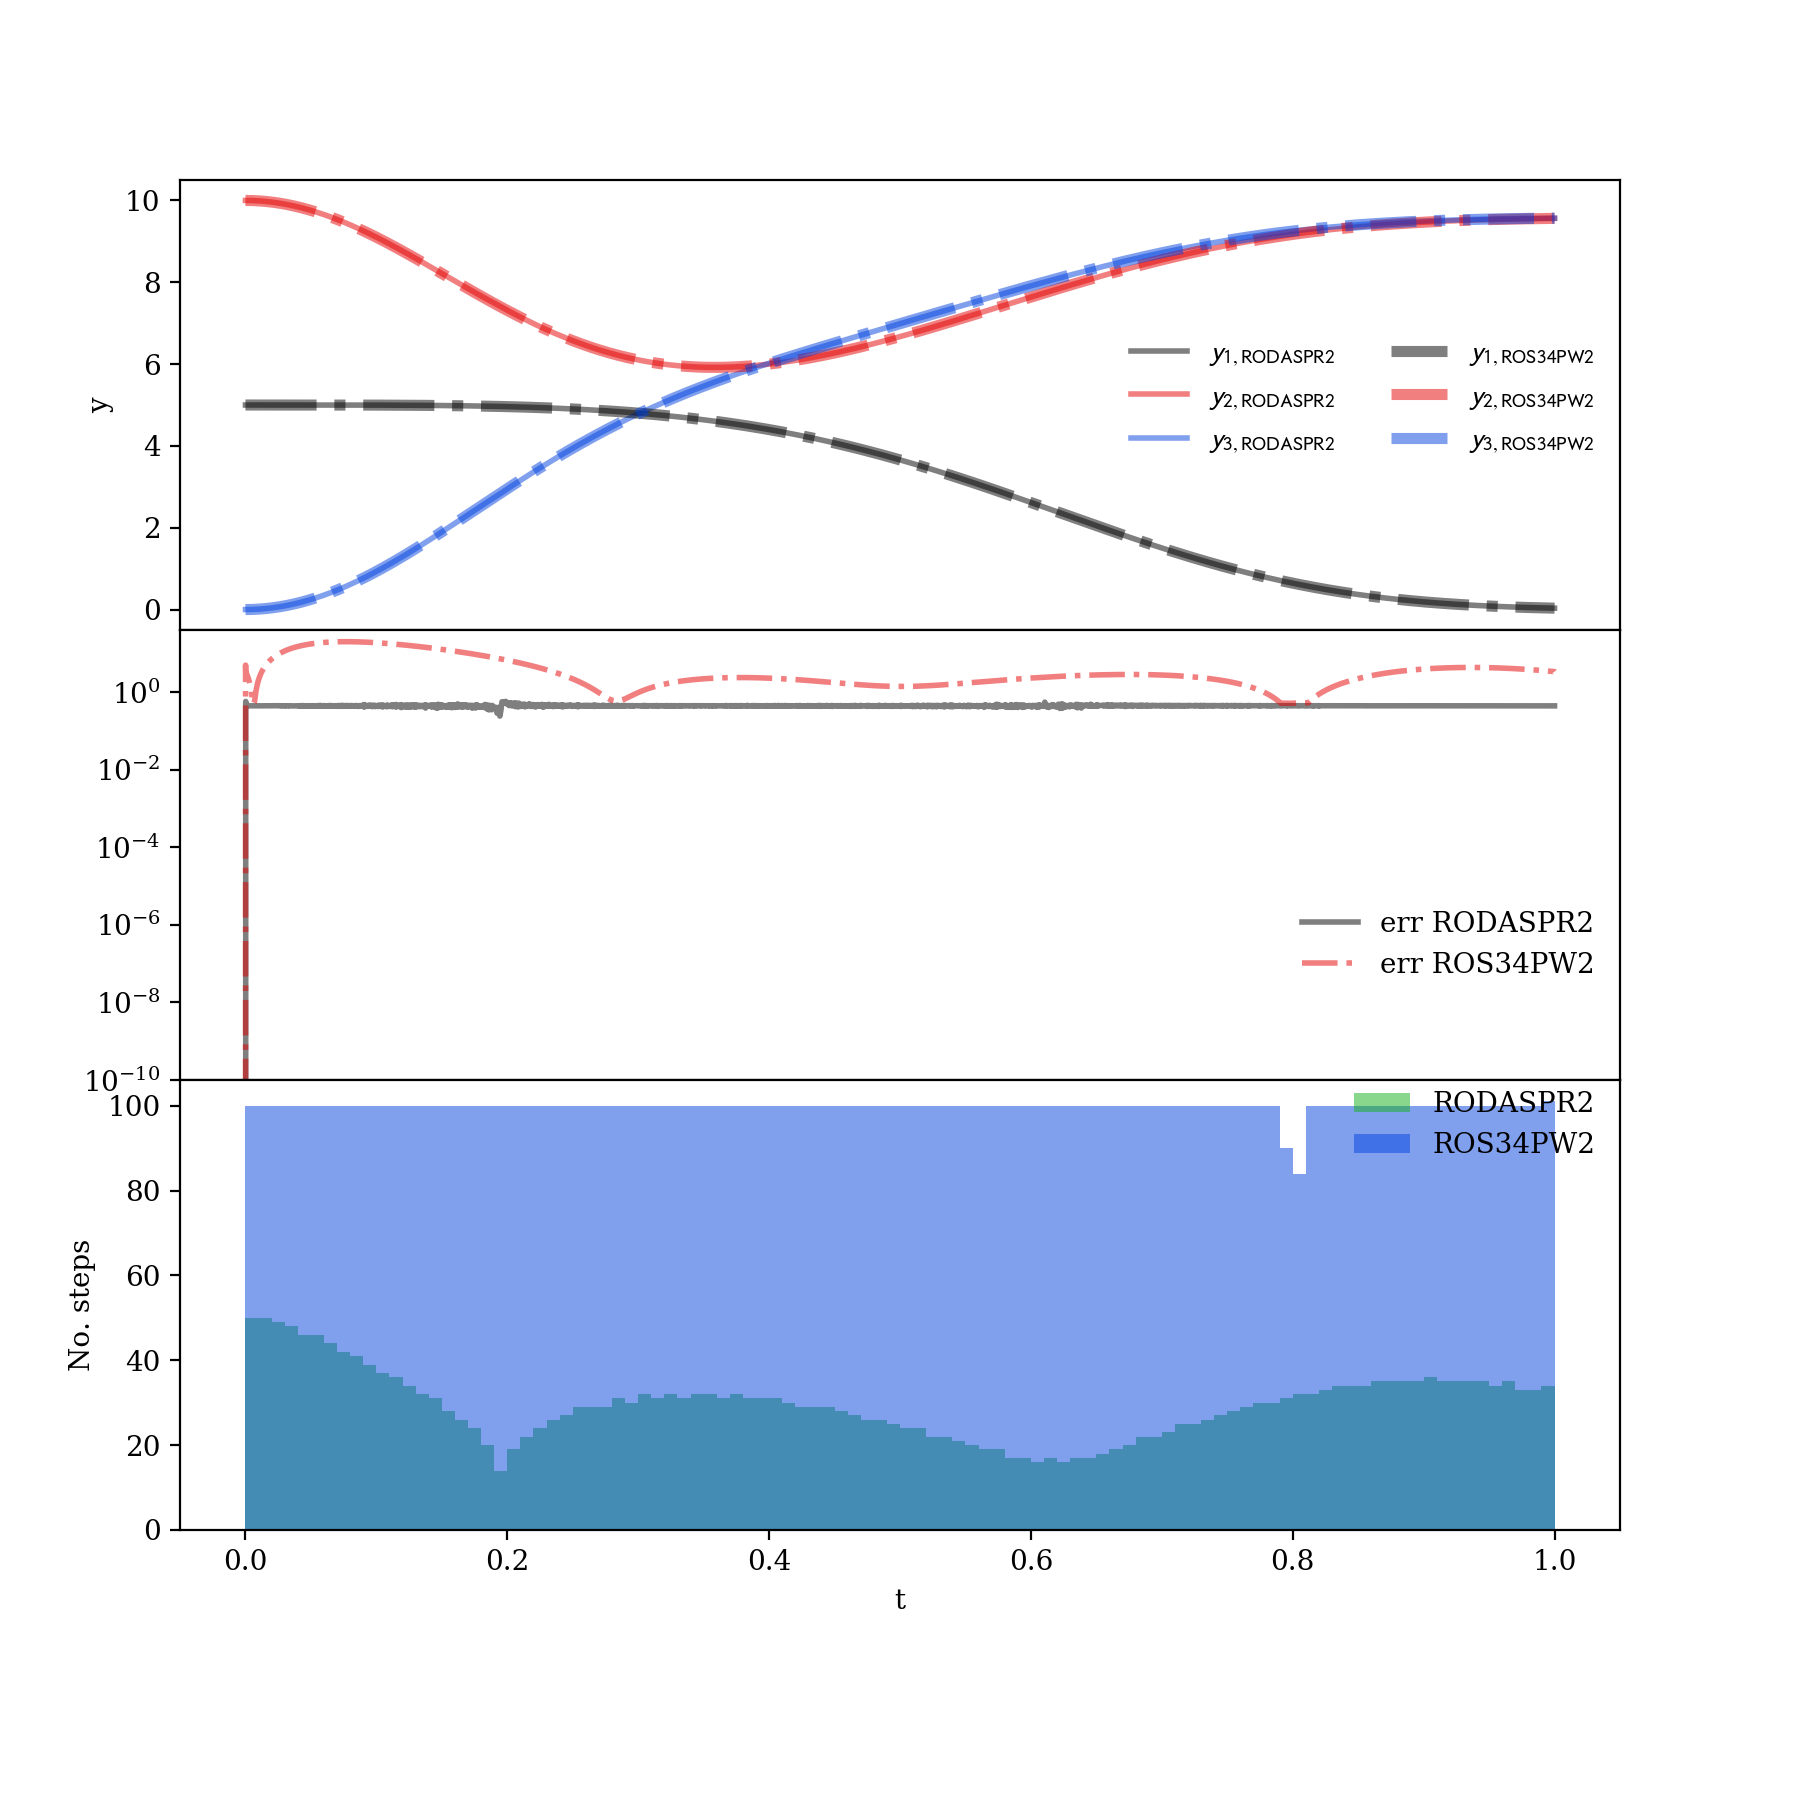

In [9]:
fig=plt.figure(figsize=(9,9))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)
fig.suptitle('')



_c=['xkcd:black','xkcd:red','xkcd:blue']
sub = fig.add_subplot(311)

sub.plot(t_RODASPR2,y1_RODASPR2,c=_c[0],alpha=0.5,linestyle='-',linewidth=2,label=r'$y_{1,\rm RODASPR2}$')
sub.plot(t_RODASPR2,y2_RODASPR2,c=_c[1],alpha=0.5,linestyle='-',linewidth=2,label=r'$y_{2,\rm RODASPR2}$')
sub.plot(t_RODASPR2,y3_RODASPR2,c=_c[2],alpha=0.5,linestyle='-',linewidth=2,label=r'$y_{3,\rm RODASPR2}$')

sub.plot(t_ROS34PW2,y1_ROS34PW2,c=_c[0],alpha=0.5,linestyle='-.',linewidth=4,label=r'$y_{1,\rm ROS34PW2}$')
sub.plot(t_ROS34PW2,y2_ROS34PW2,c=_c[1],alpha=0.5,linestyle='-.',linewidth=4,label=r'$y_{2,\rm ROS34PW2}$')
sub.plot(t_ROS34PW2,y3_ROS34PW2,c=_c[2],alpha=0.5,linestyle='-.',linewidth=4,label=r'$y_{3,\rm ROS34PW2}$')

sub.legend(framealpha=0,ncol=2,loc='upper right',bbox_to_anchor=(1,.7))

sub.set_ylabel('y')   
    

sub = fig.add_subplot(312)    
sub.plot(t_RODASPR2,err_RODASPR2,c=_c[0],alpha=0.5,linestyle='-',linewidth=2,label="err RODASPR2")
sub.plot(t_ROS34PW2,err_ROS34PW2,c=_c[1],alpha=0.5,linestyle='-.',linewidth=2,label="err ROS34PW2")
sub.legend(framealpha=0,ncol=1,loc='center right',bbox_to_anchor=(1,.3))

        
if max(err_RODASPR2) != 0 : 
    sub.set_ylim(max([min(err_RODASPR2),min(err_ROS34PW2),1e-10]),max([max(err_RODASPR2),max(err_ROS34PW2)])*2 )
    sub.set_yscale('log')
else:
    sub.set_ylim(min(err_RODASPR2),max(err_RODASPR2))



sub = fig.add_subplot(313)    
sub.hist(t_RODASPR2,bins=100, color='xkcd:green', alpha=0.5, label="RODASPR2")
sub.hist(t_ROS34PW2,bins=100, color='xkcd:blue', alpha=0.5,label="ROS34PW2")
sub.legend(framealpha=0,ncol=1,loc='center right',bbox_to_anchor=(1,.9))

sub.set_ylabel('No. steps')
    
   
sub.set_xlabel('t')  
plt.show()